In [3]:

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from inout import get_dataframe
import os
from matplotlib.colors import LogNorm
import pandas as pd
import wget
import shutil
import datetime as dt
import sys
from datetime import datetime


#### Real dataset

c:\Users\user1\Documents\2021_2022\Covid19_SIR\inout.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df.loc[:,'Active'] = country_df.loc[:,'Active'].rolling(window=7).mean()
c:\Users\user1\Documents\2021_2022\Covid19_SIR\inout.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  owid_country_df.loc[:,'people_vaccinated'] = owid_country_df.loc[:,'people_vaccinated'].rolling(window=7).mean()
c:\Users\user1\Documents\2021_2022\Covid19_SIR\inout.py:172: SettingWithCopyWarning: 
A value is trying 

,0.000000,1.021277,2.042553,3.063830,4.085106,5.106383,6.127660,7.148936,8.170213,9.191489,...,38.808511,39.829787,40.851064,41.872340,42.893617,43.914894,44.936170,45.957447,46.978723,48.000000
0,0.474893,0.470901,0.467044,0.463312,0.459648,0.456070,0.452664,0.449421,0.446331,0.443437,...,0.354406,0.349407,0.344275,0.338923,0.333481,0.327904,0.322272,0.316645,0.311032,0.305425
1,0.078986,0.079020,0.079054,0.079085,0.079113,0.079142,0.079169,0.079194,0.079220,0.079244,...,0.081450,0.081715,0.081983,0.082266,0.082566,0.082872,0.083189,0.083501,0.083823,0.084151
2,0.231022,0.230563,0.229809,0.228813,0.227698,0.226402,0.224776,0.222825,0.220650,0.218127,...,0.140832,0.140417,0.140339,0.140710,0.141455,0.142533,0.143910,0.145465,0.147064,0.148837
3,0.215100,0.219516,0.224093,0.228790,0.233540,0.238386,0.243392,0.248560,0.253799,0.259193,...,0.423313,0.428460,0.433403,0.438101,0.442499,0.446691,0.450629,0.454388,0.458081,0.461587


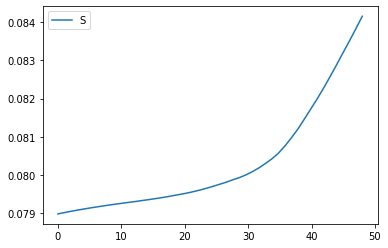

In [183]:
import pandas as pd
   # country = 'Israel'
   # begin_date = '12/1/20' #month/day/year format
   # final_date = '3/11/21'
# data = get_dataframe(country='Israel', begin_date= "12/1/20", end_date = "10/11/21")
data = get_dataframe(country='France', begin_date= "6/16/21", end_date = "8/2/21")
#data = get_dataframe(country='Germany', begin_date= "01/02/21", end_date = "05/02/22")
data1 = pd.DataFrame(data)
# plt.plot(data1.iloc[0,:])
plt.plot(data1.iloc[1,:])
# plt.plot(data1.iloc[2,:])
# plt.plot(data1.iloc[3,:])
plt.legend(['S','I','V','R'])
data1.head()


(1.0, 0.9999999999999999, 0.47489251711342845)

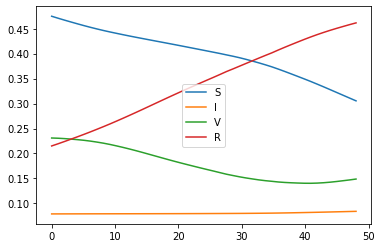

In [184]:
plt.plot(data1.iloc[0,:])
plt.plot(data1.iloc[1,:])
plt.plot(data1.iloc[2,:])
plt.plot(data1.iloc[3,:])
plt.legend(['S','I','V','R'])

l=[]
[l.append(data1.iloc[:,i].sum()) for i in range(data1.shape[1])]
# (1.0870567547395134, 0.7759047910135842)
np.max(l), np.min(l), data1.iloc[0,0]


# Custom Library

In [213]:
from pysindy.optimizers import TrappingSR3
import pysindy as ps 

library_functions = [
    lambda x : x,
    lambda x,y,z,d : x*y,
    lambda x,y,z,d : y*z
]
library_function_names = [
    lambda x : x,
    lambda x,y,z,d : x+'*'+y,
    lambda x,y,z,d : y+'*'+z
]
custom_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)
# Constraining the coefficient to be less then some threshold values
constraint_zeros = np.array([-0.15, -0.25,0.003, 0.006]).reshape(4,1)
constraint_zeros = np.array([-0.15, -0.25,0.003, 0.006]).reshape(4,1)
constraint_matrix = np.array([[1, 0., 0., 0., 0., 0., 0., 0., 0.,0.,0.,0., 0., 0., 0., 0., 0., 0.],
                              [0.,0., 0., 0., 1., 0., 0., 0., 0., 0.,0.,0., 0., 0., 0., 0., 0., 0.],
                              [0.,0., 1., 0., 0., 0., 0., 0., 0., 0.,0.,0., 0., 0., 0., 0., 0., 0.],
                              [0.,0., 0., 1., 0., 0., 0., 0., 0., 0.,0.,0., 0., 0., 0., 0., 0., 0.]
                              ])
opt = ps.TrappingSR3( threshold=0.01,
                      constraint_lhs=constraint_matrix,
                      constraint_rhs=constraint_zeros,
                      constraint_order="feature",
                      relax_optim=False
                    )
t= np.array(data1.columns)
t = np.linspace(1, len(t),1024)
X = np.stack((data1.iloc[0,:], data1.iloc[1,:], data1.iloc[2,:],data1.iloc[3,:]), axis=-1)
print(constraint_matrix.shape, constraint_zeros.shape, X.shape)
sr3_optimizer = ps.SR3(threshold=1, nu=1)
model = ps.SINDy(feature_names=['S','I','V','R'],feature_library=custom_library, optimizer=sr3_optimizer)
model.optimizer.set_params(normalize_columns=False, max_iter= 20)
model.fit(X, t=1, quiet=True)
model.print()
model.get_feature_names()

(4, 18) (4, 1) (48, 4)
(S)' = -1.478 S + -36.712 I + -11.102 V + 3.061 R + 60.019 S*I + 178.244 I*V
(I)' = 0.007 I*V
(V)' = 2.328 S + 50.082 I + 13.656 V + -4.207 R + -85.345 S*I + -225.218 I*V
(R)' = 0.526 I + 1.603 V + -1.351 S*I + -19.562 I*V


c:\users\user1\documents\2021_2022\covid19_sir\pysindy\pysindy\optimizers\trapping_sr3.py:262: UserWarning: eta was not set, so defaulting to eta = 1e20 with alpha_m = 1e-2 * eta, alpha_A = eta. Here eta is so large that the stability term in the optimization will be ignored.
  warnings.warn(


['S', 'I', 'V', 'R', 'S*I', 'I*V']

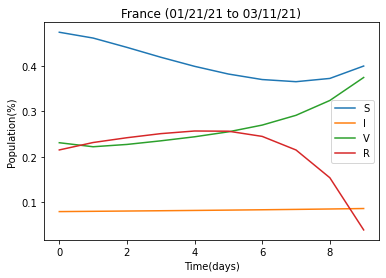

In [190]:
t = np.array(data1.columns).astype(int)
t = np.linspace(1, len(t),10)
t1 = np.arange(len(t))
x_model = model.simulate(X[0,:], t, integrator='odeint')
plt.plot(x_model[:])
plt.xlabel('Time(days)')
plt.ylabel('Population(%)')
plt.title('France (01/21/21 to 03/11/21)')
plt.legend(['S','I','V', 'R'])
plt.show()


#### Comparision of the predicted curve by SINDy to the real dataset

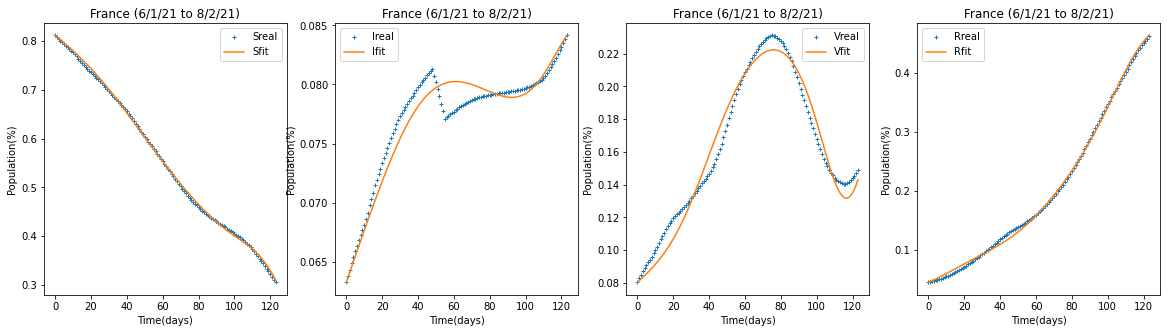

In [133]:
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(141)
plt.plot(X[:,0], '+',markersize=4)
plt.xlabel('Time(days)')
plt.ylabel('Population(%)')
plt.plot( x_model[:,0], '-',markersize=4)
plt.title('France (6/1/21 to 8/2/21)')
plt.legend(['Sreal','Sfit'])
ax = fig.add_subplot(142)
plt.plot(X[:,1], '+',markersize=4)
plt.xlabel('Time(days)')
plt.ylabel('Population(%)')
plt.plot( x_model[:,1], '-',markersize=4)
plt.title('France (6/1/21 to 8/2/21)')
plt.legend(['Ireal','Ifit'])
ax = fig.add_subplot(143)
plt.plot(X[:,2], '+',markersize=4)
plt.xlabel('Time(days)')
plt.ylabel('Population(%)')
plt.plot( x_model[:,2], '-',markersize=4)
plt.title('France (6/1/21 to 8/2/21)')
plt.legend(['Vreal', 'Vfit'])
ax = fig.add_subplot(144)
plt.plot(X[:,3], '+',markersize=4)
plt.xlabel('Time(days)')
plt.ylabel('Population(%)')
plt.plot( x_model[:,3], '-',markersize=4)
plt.title('France (6/1/21 to 8/2/21)')
plt.legend(['Rreal', 'Rfit'])

plt.show()



In [110]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

#### Extraction of the coefficients found by SINDy and compare them with the one found in the literature

In [209]:
names = model.get_feature_names()[:6]
coef = model.coefficients()
coef_dict = {}
for i in range(len(names)):
    coef_dict[names[i]] = coef[:,i]
df = pd.DataFrame(coef_dict)
df = df.T
df = df.rename(columns={0: 'S', 1: 'I',2:'V',3:'R'})
df = df.T
df.style.set_caption("The coeffecient found by SINDy")
df_true = np.zeros_like(df)
lamda = 0.95
eps = 1/21
delta = 5e-3
beta= 0.2
zeta = 1e-3
gamma = 0.08
alpha = 1/180 

df_true[0,0] = -delta
df_true[0,2] = (1-lamda)*eps
df_true[0,4] = -beta
df_true[0,3] = alpha
df_true[1,1] = -gamma
df_true[1,4] = beta
df_true[1,5] = zeta
df_true[2,0] = delta
df_true[2,5] = -zeta
df_true[2,2] = -eps
df_true[3,1] = gamma
df_true[3,3] = -alpha
df_true[3,2] = lamda*eps
df_true = pd.DataFrame(df_true)
l = list(df.columns)
df_true = df_true.rename(columns={0: l[0], 1: l[1],2:l[2],3:l[3],4:l[4],5:l[5]})
df_true = df_true.T
df_true = df_true.rename(columns={0: 'S', 1: 'I',2:'V',3:'R'})
df_true = df_true.T
df_true.style.set_caption("The coeffecient found in the literature")
display_side_by_side(df,df_true, titles=["The coeffecient found by SINDy","The coeffecient found in the literature"])



,S,I,V,R,S*I,I*V
S,-1.477976,-36.711711,-11.102046,3.060713,60.018676,178.244412
I,0.000000,0.000000,0.000000,0.000000,0.000000,0.006668
V,2.327761,50.081821,13.655973,-4.207112,-85.344930,-225.218249
R,0.000000,0.526133,1.602640,0.000000,-1.350905,-19.561921
,S,I,V,R,S*I,I*V
S,-0.005,0.00,0.002381,0.005556,-0.2,0.000
I,0.000,-0.08,0.000000,0.000000,0.2,0.001
V,0.005,0.00,-0.047619,0.000000,0.0,-0.001
R,0.000,0.08,0.045238,-0.005556,0.0,0.000


# Compare results between SINDy and Neural Networks

In [ ]:
def sirv(x, t):
    N = x[0] + x[1] + x[2] + x[3]
    dx = [0, 0, 0, 0]
    dx[0] = (1 - lamda)*eps*x[2] - delta*x[0]/N - beta*x[0]*x[1]/N + alpha*x[3]/N
    dx[1] = beta*x[0]*x[1]/N + zeta*x[1]*x[2]/N - gamma*x[1]
    dx[2] = delta*x[0]/N - zeta*x[1]*x[2]/N - eps*x[2]
    dx[3] = gamma*x[1] + lamda*eps*x[2] - alpha*x[3]/N
    return dx

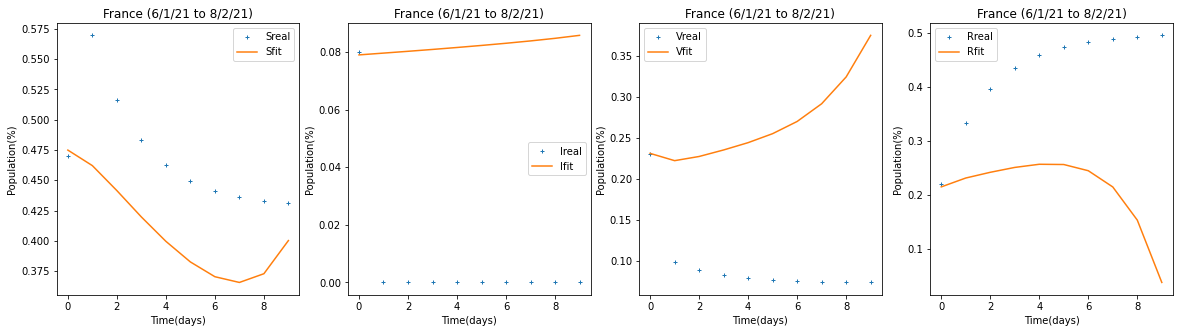

In [208]:
import numpy as np

eps = 13.655973
lamda = 1.602640/eps
delta = [1.477976, 2.327761]
delta = delta[1]
beta= [2.9, -60.018676]
beta = beta[1]
zeta = [0.006668, 11.442631]
zeta = zeta[0]
gamma = [-0.008742, -2.536032]
gamma = gamma[0]
alpha = 0.234519
t = np.array(data1.columns).astype(int)
t = np.linspace( 1., len(t1),10 )
t1 = np.arange(len(t))

color=['g','r']
N_ = odeint(sirv, [0.47,0.08,0.23,0.22], t)
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(141)
plt.plot(N_[:,0], '+',markersize=4)
plt.xlabel('Time(days)')
plt.ylabel('Population(%)')
plt.plot( x_model[:,0], '-',markersize=4)
plt.title('France (6/1/21 to 8/2/21)')
plt.legend(['Sfit','Sreal'])
ax = fig.add_subplot(142)
plt.plot(N_[:,1], '+',markersize=4)
plt.xlabel('Time(days)')
plt.ylabel('Population(%)')
plt.plot( x_model[:,1], '-',markersize=4)
plt.title('France (6/1/21 to 8/2/21)')
plt.legend(['Ifit','Ireal'])
ax = fig.add_subplot(143)
plt.plot(N_[:,2], '+',markersize=4)
plt.xlabel('Time(days)')
plt.ylabel('Population(%)')
plt.plot( x_model[:,2], '-',markersize=4)
plt.title('France (6/1/21 to 8/2/21)')
plt.legend(['Vreal', 'Vfit'])
ax = fig.add_subplot(144)
plt.plot(N_[:,3], '+',markersize=4)
plt.xlabel('Time(days)')
plt.ylabel('Population(%)')
plt.plot( x_model[:,3], '-',markersize=4)
plt.title('France (6/1/21 to 8/2/21)')
plt.legend(['Rreal', 'Rfit'])

plt.show()




[0.47 0.08 0.23 0.22]


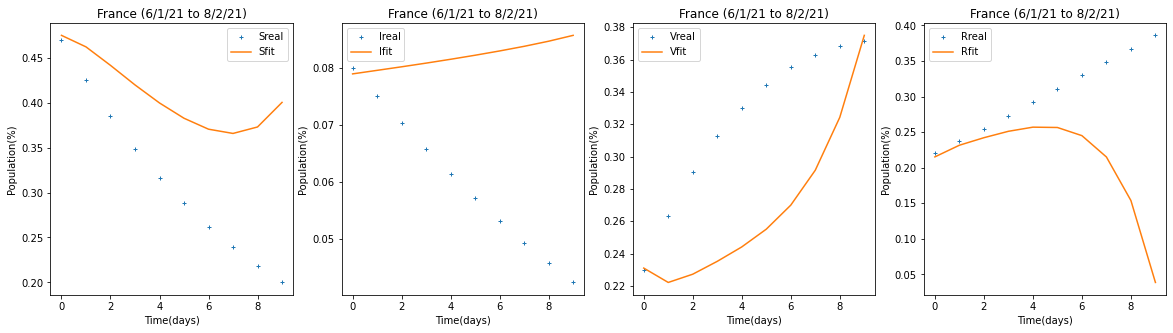

In [191]:
import numpy as np
eps = 1/21
lamda = 0.95
delta = 0.10
beta= 0.06
zeta = 1e-3
gamma = 0.09
alpha = 1/180
t = np.array(data1.columns).astype(int)
t = np.linspace( 1., len(t1), 10)
t1 = np.arange(len(t))
color=['g','r']
N_ = odeint(sirv, [0.47,0.08,0.23,0.22], t)
print(N_[0])
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(141)
plt.plot(N_[:,0], '+',markersize=4)
plt.xlabel('Time(days)')
plt.ylabel('Population(%)')
plt.plot( x_model[:,0], '-',markersize=4)
plt.title('France (6/1/21 to 8/2/21)')
plt.legend(['Sreal','Sfit'])
ax = fig.add_subplot(142)
plt.plot(N_[:,1], '+',markersize=4)
plt.xlabel('Time(days)')
plt.ylabel('Population(%)')
plt.plot( x_model[:,1], '-',markersize=4)
plt.title('France (6/1/21 to 8/2/21)')
plt.legend(['Ireal','Ifit'])
ax = fig.add_subplot(143)
plt.plot(N_[:,2], '+',markersize=4)
plt.xlabel('Time(days)')
plt.ylabel('Population(%)')
plt.plot( x_model[:,2], '-',markersize=4)
plt.title('France (6/1/21 to 8/2/21)')
plt.legend(['Vreal', 'Vfit'])
ax = fig.add_subplot(144)
plt.plot(N_[:,3], '+',markersize=4)
plt.xlabel('Time(days)')
plt.ylabel('Population(%)')
plt.plot( x_model[:,3], '-',markersize=4)
plt.title('France (6/1/21 to 8/2/21)')
plt.legend(['Rreal', 'Rfit'])

plt.show()




#### Theoritical SIRV

In [53]:
def sirv(x, t):
    N = x[0] + x[1] + x[2] + x[3]
    dx = [0, 0, 0, 0]
    dx[0] = (1 - lamda)*eps*x[2] - delta*x[0]/N - beta*x[0]*x[1]/N + alpha*x[3]/N
    dx[1] = beta*x[0]*x[1]/N + zeta*x[1]*x[2]/N - gamma*x[1]
    dx[2] = delta*x[0]/N - zeta*x[1]*x[2]/N - eps*x[2]
    dx[3] = gamma*x[1] + lamda*eps*x[2] - alpha*x[3]/N
    return dx

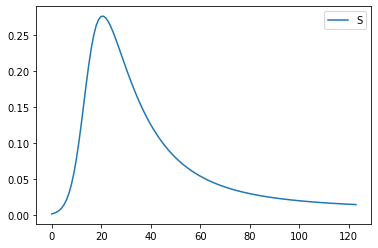

In [54]:
import numpy as np

lamda = 0.9
eps = 1/21
delta = 0.8
beta= 0.8
zeta = 0.6
gamma = 0.07
alpha = 1/180 
t1 = np.array(data1.columns).astype(int)
t = np.linspace( 1., len(t1), len(t1))
color=['g','r']
N_ = odeint(sirv, [0.94,1.13e-03,0.,0.06], t)
plt.plot(N_[:,1], markersize=4)
plt.legend(['S','I','V','R'])

# SENSITIVITY ANALYSIS

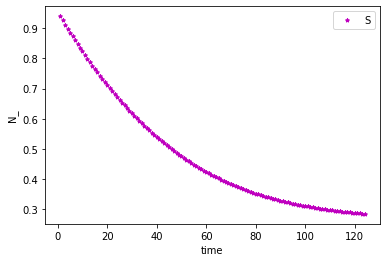

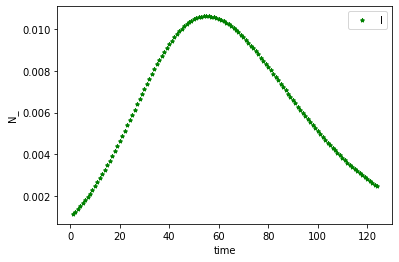

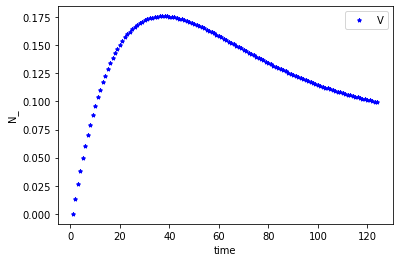

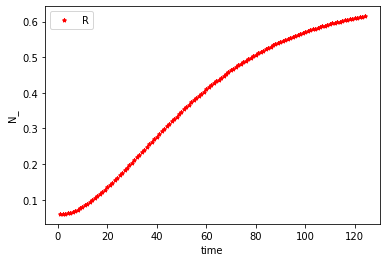

In [55]:
lamda = 0.95
eps = 1/21
delta = 0.015
beta= 0.2
zeta = 0.005
gamma = 0.09
alpha=1/180

t1 = np.array(data1.columns).astype(int)
t = np.linspace( 1., len(t1), len(t1))
# color=['g','r']
# N_ = odeint(sirv, [0.94,1.13e-03,0.,0.06], t)
N_truth = odeint(sirv, [0.94,1.13e-03,0.,0.06], t)

plt.plot(t,N_truth[:,0],'*', color="m",markersize=4)
plt.legend(["S"])
plt.xlabel("time")
plt.ylabel("N_")
plt.show()
plt.plot(t,N_truth[:,1],'*', color="g",markersize=4)
plt.legend(["I"])
plt.xlabel("time")
plt.ylabel("N_")
plt.show()
plt.plot(t,N_truth[:,2],'*', color="b",markersize=4)
plt.legend(["V"])
plt.xlabel("time")
plt.ylabel("N_")
plt.show()
plt.plot(t,N_truth[:,3],'*', color="r",markersize=4)
plt.legend(["R"])
plt.xlabel("time")
plt.ylabel("N_")
plt.show()

In [56]:
#lmd = 0.95
lmd_ = np.linspace(0.90, 0.96,2)
eps = 1/21
delta = 0.015
beta= 0.2
zeta = 0.005
gamma = 0.09
alpha=1/180
t1 = np.array(data1.columns).astype(int)
t = np.linspace( 1., len(t1), len(t1))
X_lmd=np.zeros((4,len(lmd_)))  
for i, lamda in enumerate(lmd_):
    N_ = odeint(sirv, [0.94,1.13e-03,0.,0.06], t)
    X_lmd[0,i]=np.max([abs(N_[:,0]-N_truth[:,0])])
    X_lmd[1,i]=np.max([abs(N_[:,1]-N_truth[:,1])])
    X_lmd[2,i]=np.max([abs(N_[:,2]-N_truth[:,2])])
    X_lmd[3,i]=np.max([abs(N_[:,3]-N_truth[:,3])])

In [57]:
import pandas as pd
def hist(X, title,values):
    df_lmd = pd.DataFrame(X)
    df_lmd = df_lmd.T
    df_lmd = df_lmd.rename(columns={0: 'S', 1: 'I',2: 'V',3: 'R'})
    df_lmd = df_lmd.T
    df_lmd = df_lmd.rename(columns={0: values[0], 1: values[1]})
    df_lmd = df_lmd.T
    df_lmd.iloc[:,:].plot(kind='bar', title=title)
    return df_lmd 

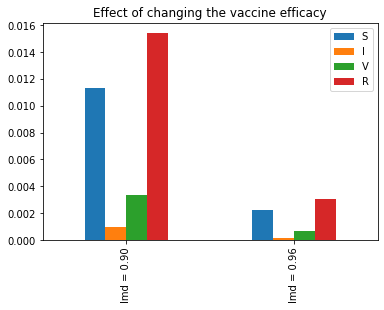

In [58]:
values = ['lmd = 0.90', 'lmd = 0.96']
title = 'Effect of changing the vaccine efficacy'
df_lmd = hist(X_lmd, title,values)

In [59]:
lamda = 0.95
eps_ = np.linspace(1/365, 1/180,2)
# eps = 1/21
delta = 0.015
beta= 0.2
zeta = 0.005
gamma = 0.09
alpha=1/180

t1 = np.array(data1.columns).astype(int)
t = np.linspace( 1., len(t1), len(t1))
X_eps=np.zeros((4,len(eps_)))
for i, eps in enumerate(eps_):
    N_ = odeint(sirv, [0.94,1.13e-03,0.,0.06], t)
    X_eps[0,i]=np.max(np.abs(N_[:,0]-N_truth[:,0]))
    X_eps[1,i]=np.max(np.abs(N_[:,1]-N_truth[:,1]))
    X_eps[2,i]=np.max(np.abs(N_[:,2]-N_truth[:,2]))
    X_eps[3,i]=np.max(np.abs(N_[:,3]-N_truth[:,3]))

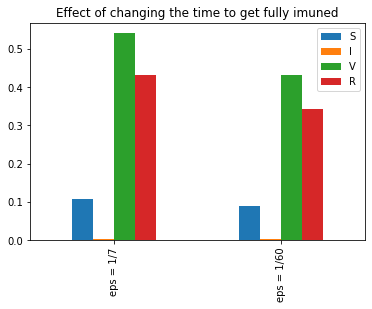

In [60]:
values = ['eps = 1/7', 'eps = 1/60']
title = 'Effect of changing the time to get fully imuned'
df_eps=hist(X_eps, title,values)

In [61]:
lamda = 0.95
eps = 1/21
dlt = 0.015
dlt_ = np.linspace(1e-3, 1e-2,2)
beta= 0.2
zeta = 0.005
gamma = 0.09
alpha=1/180
t1 = np.array(data1.columns).astype(int)
t = np.linspace( 1., len(t1), len(t1))
X_dlt=np.zeros((4,len(dlt_)))
for i, delta in enumerate(dlt_):
    N_ = odeint(sirv, [0.94,1.13e-03,0.,0.06], t)
    X_dlt[0,i]=np.max(np.abs(N_[:,0]-N_truth[:,0]))
    X_dlt[1,i]=np.max(np.abs(N_[:,1]-N_truth[:,1]))
    X_dlt[2,i]=np.max(np.abs(N_[:,2]-N_truth[:,2]))
    X_dlt[3,i]=np.max(np.abs(N_[:,3]-N_truth[:,3]))

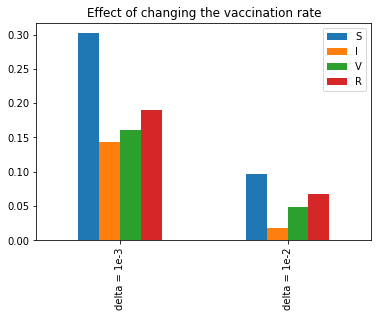

In [62]:
values = ['delta = 1e-3', 'delta = 1e-2']
title = 'Effect of changing the vaccination rate'
df_dlt = hist(X_dlt, title,values)

In [63]:
lamda = 0.95
delta = 0.015
eps = 1/21
bet= 0.2
bet_ = np.linspace(0.1, 0.25,2)
zeta = 0.005
gamma = 0.09
alpha=1/180
t1 = np.array(data1.columns).astype(int)
t = np.linspace( 1., len(t1), len(t1))
X_bet=np.zeros((4,len(bet_)))
for i, beta in enumerate(bet_):
    N_ = odeint(sirv, [0.94,1.13e-03,0.,0.06], t)
    X_bet[0,i]=np.max(np.abs(N_[:,0]-N_truth[:,0]))
    X_bet[1,i]=np.max(np.abs(N_[:,1]-N_truth[:,1]))
    X_bet[2,i]=np.max(np.abs(N_[:,2]-N_truth[:,2]))
    X_bet[3,i]=np.max(np.abs(N_[:,3]-N_truth[:,3]))

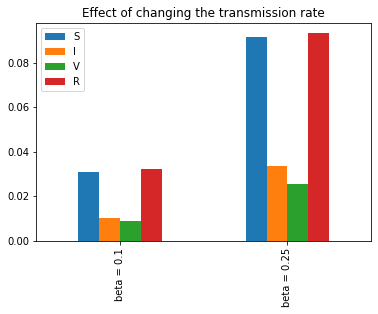

In [64]:
values = ['beta = 0.1', 'beta = 0.25']
title = 'Effect of changing the transmission rate'
df_bet = hist(X_bet, title,values)

In [65]:
lamda = 0.95
delta = 0.015
eps = 1/21
beta= 0.2
zt = 1e-3
zt_ = np.linspace(1e-3, 1e-2,2)
gamma = 0.09
alpha=1/180
t1 = np.array(data1.columns).astype(int)
t = np.linspace( 1., len(t1), len(t1))
X_zt=np.zeros((4,len(zt_)))
for i, zeta in enumerate(zt_):
    N_ = odeint(sirv, [0.94,1.13e-03,0.,0.06], t)
    X_zt[0,i]=np.max(np.abs(N_[:,0]-N_truth[:,0]))
    X_zt[1,i]=np.max(np.abs(N_[:,1]-N_truth[:,1]))
    X_zt[2,i]=np.max(np.abs(N_[:,2]-N_truth[:,2]))
    X_zt[3,i]=np.max(np.abs(N_[:,3]-N_truth[:,3]))

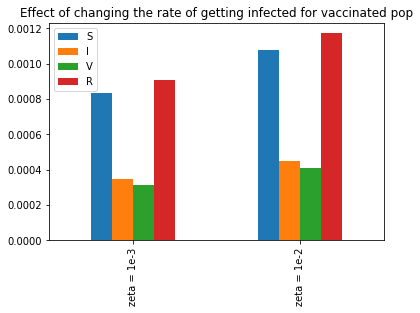

In [66]:
values = ['zeta = 1e-3', 'zeta = 1e-2']
title = 'Effect of changing the rate of getting infected for vaccinated pop'
df_zt = hist(X_zt, title,values)

In [67]:
lamda = 0.95
delta = 0.015
beta= 0.2
eps = 1/180
zeta = 0.005
gm = 0.09
gm_ = np.linspace(0.07, 0.12,2)
alpha=1/180
t1 = np.array(data1.columns).astype(int)
t = np.linspace( 1., len(t1), len(t1))
X_gm=np.zeros((4,len(gm_)))
for i, gamma in enumerate(gm_):
    N_ = odeint(sirv, [0.94,1.13e-03,0.,0.06], t)
    X_gm[0,i]=np.max(np.abs(N_[:,0]-N_truth[:,0]))
    X_gm[1,i]=np.max(np.abs(N_[:,1]-N_truth[:,1]))
    X_gm[2,i]=np.max(np.abs(N_[:,2]-N_truth[:,2]))
    X_gm[3,i]=np.max(np.abs(N_[:,3]-N_truth[:,3]))

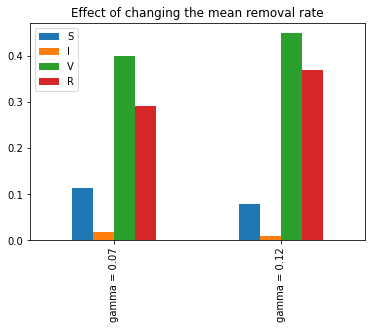

In [68]:
values = ['gamma = 0.07', 'gamma = 0.12']
title = 'Effect of changing the mean removal rate'
df_gm = hist(X_gm, title,values)

In [69]:
lamda = 0.95
delta = 0.015
beta= 0.2
eps = 1/180
zeta = 0.005
gamma = 0.09
alp_= np.linspace(1/90, 1/280,2)
t1 = np.array(data1.columns).astype(int)
t = np.linspace( 1., len(t1), len(t1))
X_alp=np.zeros((4,len(alp_)))
for i, alpha in enumerate(alp_):
    N_ = odeint(sirv, [0.94,1.13e-03,0.,0.06], t)
    X_alp[0,i]=np.max(np.abs(N_[:,0]-N_truth[:,0]))
    X_alp[1,i]=np.max(np.abs(N_[:,1]-N_truth[:,1]))
    X_alp[2,i]=np.max(np.abs(N_[:,2]-N_truth[:,2]))
    X_alp[3,i]=np.max(np.abs(N_[:,3]-N_truth[:,3]))

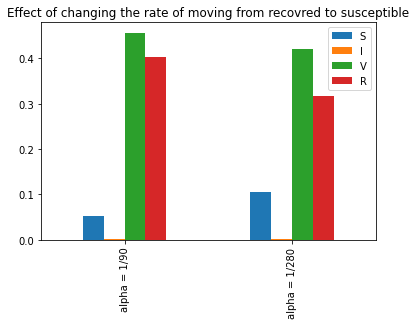

In [70]:
values = ['alpha = 1/90', 'alpha = 1/280']
title = 'Effect of changing the rate of moving from recovred to susceptible'
df_alp = hist(X_alp, title,values)

(0.010307795280285786,
 0.03331200150606091,
 3.2317290555597187,
 3.2317290555597187)

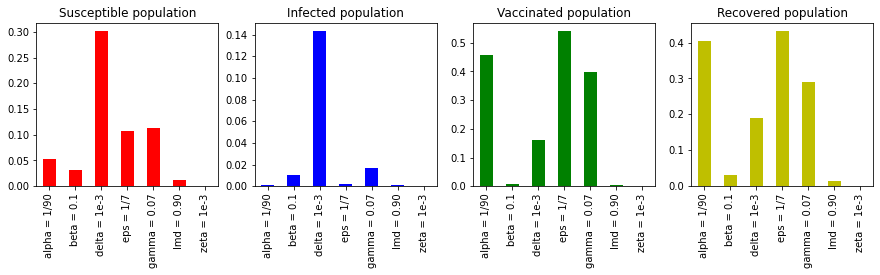

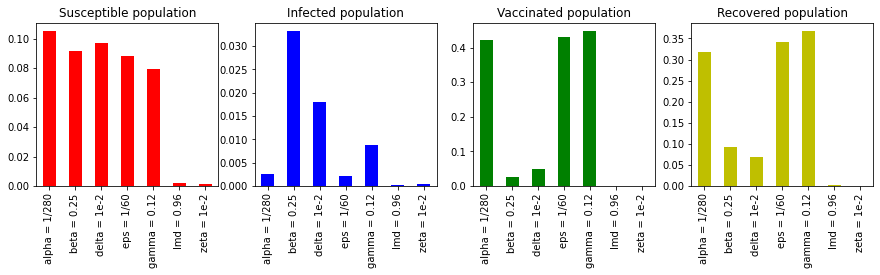

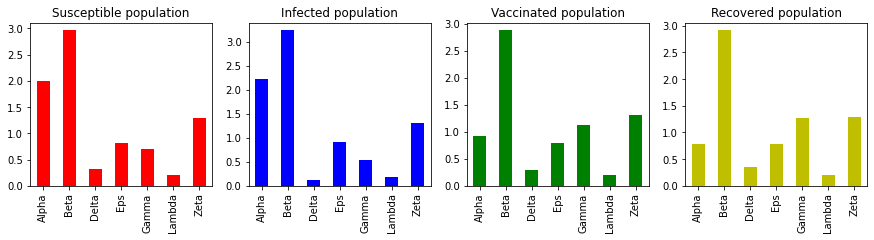

In [73]:
df_min = pd.concat([df_alp.iloc[0,:], df_bet.iloc[0,:], df_dlt.iloc[0,:],df_eps.iloc[0,:],df_gm.iloc[0,:], df_lmd.iloc[0,:], df_zt.iloc[0,:]], axis=1 )
df_max = pd.concat([df_alp.iloc[1,:], df_bet.iloc[1,:], df_dlt.iloc[1,:],df_eps.iloc[1,:],df_gm.iloc[1,:], df_lmd.iloc[1,:], df_zt.iloc[1,:]], axis=1 )
prop = pd.DataFrame(np.array(df_max)/np.array(df_min))
l = ['Alpha','Beta','Delta','Eps', 'Gamma', 'Lambda', 'Zeta']
l1 = list(df_min.T.columns)
# df_min.iloc[]
prop = prop.rename(columns={0: l[0], 1: l[1],2: l[2],3: l[3],4: l[4],5: l[5],6: l[6]})
prop = prop.T
prop = prop.rename(columns={0: l1[0], 1: l1[1], 2: l1[2], 3: l1[3]})
prop = prop.T
fig = plt.figure(figsize = (15,3))
ax = fig.add_subplot(141)
df_min.iloc[0,:].plot(kind='bar', color='r', title='Susceptible population',ax=ax)
ax = fig.add_subplot(142)
df_min.iloc[1,:].plot(kind='bar', color='b', title='Infected population',ax=ax)
ax = fig.add_subplot(143)
df_min.iloc[2,:].plot(kind='bar', color='g', title='Vaccinated population',ax=ax)
ax = fig.add_subplot(144)
df_min.iloc[3,:].plot(kind='bar', color='y', title='Recovered population',ax=ax)

fig = plt.figure(figsize = (15,3))
ax = fig.add_subplot(141)
df_max.iloc[0,:].plot(kind='bar', color='r', title='Susceptible population',ax=ax)
ax = fig.add_subplot(142)
df_max.iloc[1,:].plot(kind='bar', color='b', title='Infected population',ax=ax)
ax = fig.add_subplot(143)
df_max.iloc[2,:].plot(kind='bar', color='g', title='Vaccinated population',ax=ax)
ax = fig.add_subplot(144)
df_max.iloc[3,:].plot(kind='bar', color='y', title='Recovered population',ax=ax)

fig = plt.figure(figsize = (15,3))
ax = fig.add_subplot(141)
prop.iloc[0,:].plot(kind='bar', color='r', title='Susceptible population',ax=ax)
ax = fig.add_subplot(142)
prop.iloc[1,:].plot(kind='bar', color='b', title='Infected population',ax=ax)
ax = fig.add_subplot(143)
prop.iloc[2,:].plot(kind='bar', color='g', title='Vaccinated population',ax=ax)
ax = fig.add_subplot(144)
prop.iloc[3,:].plot(kind='bar', color='y', title='Recovered population',ax=ax)

df_min.iloc[1,1],df_max.iloc[1,1], prop.iloc[1,1], df_max.iloc[1,1]/df_min.iloc[1,1]
# df_min.head()


#### Application of SINDy on a theoritical dataset generated using ODEint and coefficients from the literature 

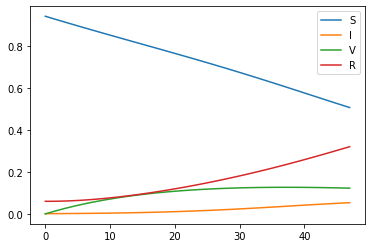

In [290]:
def sirv(x, t):
    N = x[0] + x[1] + x[2] + x[3]
    dx = [0, 0, 0, 0]
    dx[0] = (1 - lamda)*eps*x[2] - delta*x[0]/N - beta*x[0]*x[1]/N + alpha*x[3]/N
    dx[1] = beta*x[0]*x[1]/N + zeta*x[1]*x[2]/N - gamma*x[1]
    dx[2] = delta*x[0]/N - zeta*x[1]*x[2]/N - eps*x[2]
    dx[3] = gamma*x[1] + lamda*eps*x[2] - alpha*x[3]/N
    return dx

lamda = 0.95
eps = 1/21
delta = 1e-2
beta= 0.25
zeta = 1e-3
gamma = 0.10
alpha = 1/180
t1 = np.array(data1.columns).astype(int)
t = np.linspace( 1., len(t1), len(t1))
N_ = odeint(sirv, [0.94,1.13e-03,0.,0.06], t)
plt.plot(N_[:], markersize=4)
plt.legend(['S','I','V','R'])

In [302]:
import pysindy as ps 
t= np.array(data1.columns)
t = np.linspace(1, len(t),len(t))
X = np.stack((N_[:,0], N_[:,1], N_[:,2],N_[:,3]), axis=-1)
model = ps.SINDy(feature_names=['S','I','V','R'],feature_library=custom_library)
model.optimizer.set_params(normalize_columns=False, max_iter= 20, threshold=0.0009)
model.fit(X, t=t[1]-t[0])
model.print()
model.get_feature_names()

(S)' = -0.010 S + 0.001 I + 0.002 V + 0.005 R + -0.249 S*I
(I)' = 0.006 V + 0.004 R
(V)' = 0.010 S + 0.001 I + -0.048 V + -0.001 S*I
(R)' = 0.100 I + 0.045 V + -0.006 R


['S', 'I', 'V', 'R', 'S*I', 'I*V']

(48, 4)


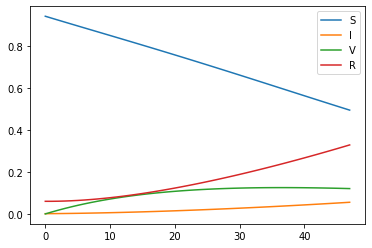

In [303]:
t = np.array(data1.columns).astype(int)
t = np.linspace(1, len(t),len(t))
t1 = np.arange(len(t))
x_model = model.simulate(X[0,:], t, integrator='odeint')
print(x_model.shape)
plt.plot(x_model[:,:])
plt.legend(['S','I','V', 'R'])
plt.show()


#### Comparison of the curves simulated using the coefficient obtained by SINDy to the theoritical curve

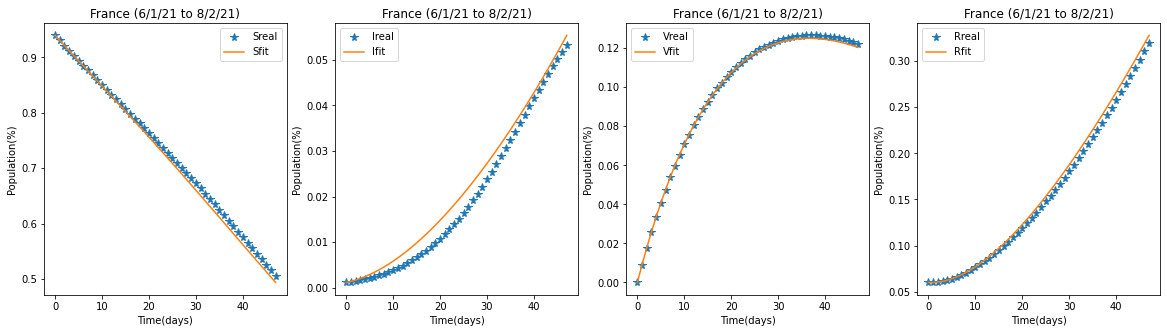

In [304]:
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(141)
plt.plot(N_[:,0], '*',markersize=8)
plt.xlabel('Time(days)')
plt.ylabel('Population(%)')
plt.plot( x_model[:,0], '-',markersize=4)
plt.title('France (6/1/21 to 8/2/21)')
plt.legend(['Sreal','Sfit'])
ax = fig.add_subplot(142)
plt.plot(N_[:,1], '*',markersize=8)
plt.xlabel('Time(days)')
plt.ylabel('Population(%)')
plt.plot( x_model[:,1], '-',markersize=4)
plt.title('France (6/1/21 to 8/2/21)')
plt.legend(['Ireal','Ifit'])
ax = fig.add_subplot(143)
plt.plot(N_[:,2], '*',markersize=8)
plt.xlabel('Time(days)')
plt.ylabel('Population(%)')
plt.plot( x_model[:,2], '-',markersize=4)
plt.title('France (6/1/21 to 8/2/21)')
plt.legend(['Vreal', 'Vfit'])
ax = fig.add_subplot(144)
plt.plot(N_[:,3], '*',markersize=8)
plt.xlabel('Time(days)')
plt.ylabel('Population(%)')
plt.plot( x_model[:,3], '-',markersize=4)
plt.title('France (6/1/21 to 8/2/21)')
plt.legend(['Rreal', 'Rfit'])

plt.show()

#### Comparison of the coeffecients obtained by SINDy to the ones obtained from literature

In [305]:
names = model.get_feature_names()[:6]
coef = model.coefficients()
coef_dict = {}
for i in range(len(names)):
    coef_dict[names[i]] = coef[:,i]
df = pd.DataFrame(coef_dict)
df = df.T
df = df.rename(columns={0: 'S', 1: 'I',2:'V',3:'R'})
df = df.T
df.style.set_caption("The coeffecient found by SINDy")
df_true = np.zeros_like(df)

df_true[0,0] = -delta
df_true[0,2] = (1-lamda)*eps
df_true[0,4] = -beta
df_true[0,3] = alpha
df_true[1,1] = -gamma
df_true[1,4] = beta
df_true[1,5] = zeta
df_true[2,0] = delta
df_true[2,5] = -zeta
df_true[2,2] = -eps
df_true[3,1] = gamma
df_true[3,3] = -alpha
df_true[3,2] = lamda*eps
df_true = pd.DataFrame(df_true)
l = list(df.columns)
df_true = df_true.rename(columns={0: l[0], 1: l[1],2:l[2],3:l[3],4:l[4],5:l[5]})
df_true = df_true.T
df_true = df_true.rename(columns={0: 'S', 1: 'I',2:'V',3:'R'})
df_true = df_true.T
df_true.style.set_caption("The coeffecient found in the literature")
display_side_by_side(df,df_true, titles=["The coeffecient found by SINDy","The coeffecient found in the literature"])



,S,I,V,R,S*I,I*V
S,-0.009980,0.000550,0.002380,0.005377,-0.248938,0.0
I,0.000000,0.000000,0.006001,0.003568,0.000000,0.0
V,0.010004,0.001456,-0.047519,-0.000273,-0.000661,0.0
R,0.000000,0.099910,0.045224,-0.005570,0.000442,0.0
,S,I,V,R,S*I,I*V
S,-0.01,0.0,0.002381,0.005556,-0.25,0.000
I,0.00,-0.1,0.000000,0.000000,0.25,0.001
V,0.01,0.0,-0.047619,0.000000,0.00,-0.001
R,0.00,0.1,0.045238,-0.005556,0.00,0.000
